In [1]:
import cv2 as cv
import os
import pytesseract
from PIL import Image
from IPython.display import display

In [14]:
face_cascade = cv.CascadeClassifier('requiredFiles/haarcascade_frontalface_default.xml') 

d = {}  # global dictionary to store faces and text obtained from images

pathShort = 'requiredFiles/projectImagesLarge' # location for project images 

In [15]:
# function to extract bounding boxes for faces present in the given image
def extractFaces(imageName):
    path = pathShort+'/'+imageName
    img = cv.imread(path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if imageName not in d:
        d[imageName] = {'faces': [], 'text': ""}
    if len(faces)!=0:
        faces = faces.tolist()
        for face in faces:
            d[imageName]['faces'] = faces
    else:
        pass  # if no face was found in the image, let the faces list be empty 
    
# function to extract text from given image
def extractText(imageName):
    path = pathShort+'/'+imageName
    img = Image.open(path)
    txt = pytesseract.image_to_string(img)
    if imageName not in d:
        d[imageName] = {'faces': [], 'text': ""}
    if len(txt) != 0:
        d[imageName]['text'] = txt
    else:
        pass

# function to search for the input text in images
def searchText(text):
    results = {}   # will contain the faces for images in which text is found
    for image in d.keys():
        if text in d[image]['text']:
            results[image] = d[image]['faces']
    return results

# function to display the found images as a contact sheet
def showImages(results):
    if len(results.keys()) == 0:
        print('No image contains that text')
    else:
        print("Faces on the pages where the given text was present are displayed below...")
        for image in results.keys():
            print(image)
            path = pathShort+'/'+image
            img = Image.open(path)
            total = len(results[image])
            if total != 0: 
                div = total/5  # for calculating required rows in canvas
                if int(div)<div:
                    rows = int(div)+1
                else:
                    rows = int(div)
                canvas = Image.new(img.mode, (5*100, 100*rows))
                h = 100
                w = 100
                size = 100, 100
                currH = 0
                currW = 0
                count = 0
                for face in results[image]:
                    count+=1
                    x1 = face[0]
                    y1 = face[1]
                    x2 = face[0]+face[2]
                    y2 = face[1]+face[3]
                    f = img.crop((x1, y1, x2, y2))
                    f.thumbnail(size)
                    canvas.paste(f, (currW, currH))
                    if count%5 == 0:
                        currW = 0
                        currH+=100
                    else:
                        currW+=100
                display(canvas)
            else:
                print('No faces present in this image!')


In [16]:
for file in os.listdir(pathShort):
    print('finding faces in', file)
    extractFaces(file)

finding faces in a-0.png
finding faces in a-1.png
finding faces in a-10.png
finding faces in a-11.png
finding faces in a-12.png
finding faces in a-13.png
finding faces in a-2.png
finding faces in a-3.png
finding faces in a-4.png
finding faces in a-5.png
finding faces in a-6.png
finding faces in a-7.png
finding faces in a-8.png
finding faces in a-9.png


In [17]:
for file in os.listdir(pathShort):
    print('finding text in', file)
    extractText(file)

finding text in a-0.png
finding text in a-1.png
finding text in a-10.png
finding text in a-11.png
finding text in a-12.png
finding text in a-13.png
finding text in a-2.png
finding text in a-3.png
finding text in a-4.png
finding text in a-5.png
finding text in a-6.png
finding text in a-7.png
finding text in a-8.png
finding text in a-9.png


Please provide text to search: news
Faces on the pages where the given text was present are displayed below...
a-0.png


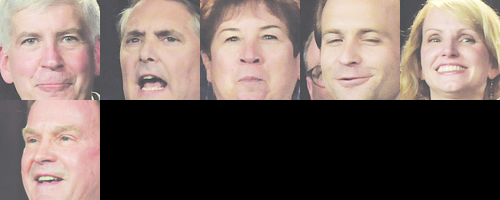

a-1.png


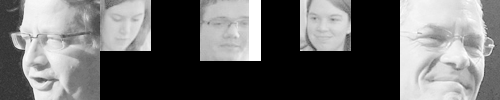

a-12.png
No faces present in this image!
a-2.png


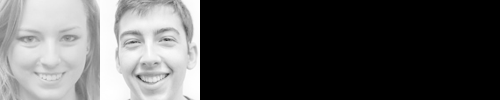

a-4.png
No faces present in this image!


In [19]:
txtToSearch = input('Please provide text to search: ')
if len(txtToSearch)>=1:
    results = searchText(txtToSearch)
    showImages(results)